Before Sorting
   Height  Weight        Class   Distance
0     167     102  Underweight  12.369317
1     182     124       Normal  15.620499
2     176     138       Normal  24.738634
3     173     128       Normal  14.317821
4     172     130       Normal  16.124515
5     174     112  Underweight   4.472136
6     169     116       Normal   2.236068
7     173     114       Normal   3.000000
8     170     110       Normal   4.000000


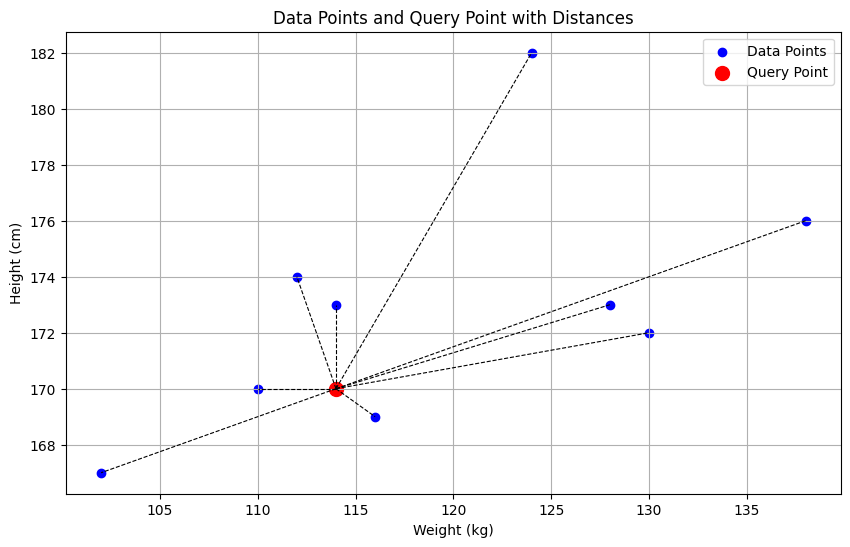

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
# Dataset with Height, Weight, and Class
data = {
    'Height': [167, 182, 176, 173, 172, 174, 169, 173, 170],
    'Weight': [102, 124, 138, 128, 130, 112, 116, 114, 110],
    'Class': ['Underweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Underweight', 'Normal', 'Normal', 'Normal']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Query point
query_point = np.array([170, 114])

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sqrt(sum((point1 - point2) ** 2))

# Calculate distance from the query point to each point in the dataset
distances = []
for i, row in df.iterrows():
    data_point = np.array([row['Height'], row['Weight']])
    distance = euclidean_distance(query_point, data_point)
    distances.append((distance, row['Class']))

# Add distances to the DataFrame
df['Distance'] = [dist[0] for dist in distances]
print("Before Sorting")
print(df)

# Plot with switched axes: Weight on X-axis and Height on Y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'], label="Data Points", color='blue')
plt.scatter(query_point[1], query_point[0], color='red', label="Query Point", s=100)  # Query point in red

# Draw lines representing distances from query point to each data point
for _, row in df.iterrows():
    plt.plot([query_point[1], row['Weight']], [query_point[0], row['Height']], 'k--', linewidth=0.8)

# Labeling and Legend
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Data Points and Query Point with Distances")
plt.legend()
plt.grid(True)
plt.show()




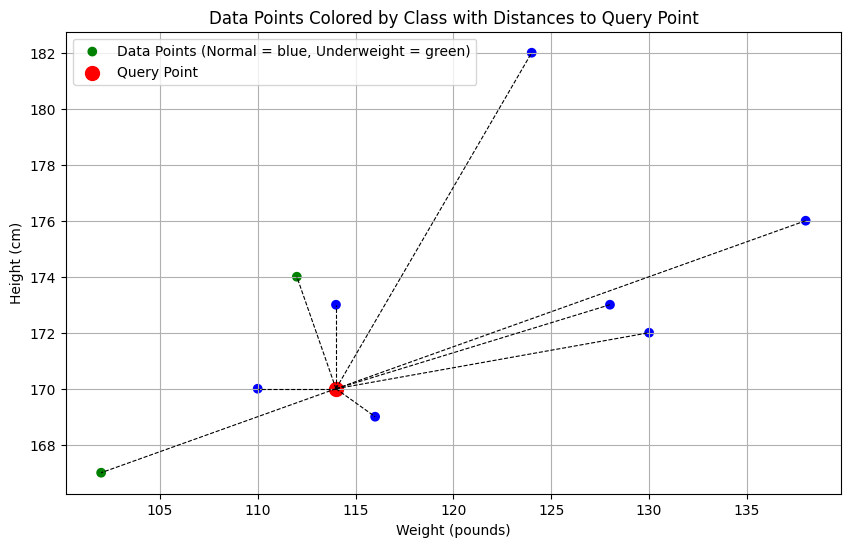

In [ ]:
# Define color mapping based on class label without using LabelEncoder
class_colors = {'Normal': 'blue', 'Underweight': 'green'}
colors = df['Class'].map(class_colors)  # Map class names directly to colors

# Plot with Weight on X-axis and Height on Y-axis, colored by class
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'], c=colors, label="Data Points")  # Color by class
plt.scatter(query_point[1], query_point[0], color='red', label="Query Point", s=100)  # Query point in red

# Draw lines representing distances from query point to each data point
for _, row in df.iterrows():
    plt.plot([query_point[1], row['Weight']], [query_point[0], row['Height']], 'k--', linewidth=0.8)

# Labeling and Legend
plt.xlabel("Weight (pounds)")
plt.ylabel("Height (cm)")
plt.title("Data Points Colored by Class with Distances to Query Point")
plt.legend(["Data Points (Normal = blue, Underweight = green)", "Query Point"])
plt.grid(True)
plt.show()

In [ ]:
# Sort by Distance
df_sorted = df.sort_values(by='Distance').reset_index(drop=True)
# Display the sorted DataFrame
#print("Sorted Table")
# Add a Rank column based on the sorted order of distances
df_sorted['Rank'] = df_sorted['Distance'].rank(method='first').astype(int)

# Display the sorted DataFrame with Rank column
#print(df_sorted)


# Choose k nearest neighbors
k = 3
nearest_neighbors = df_sorted.head(k)

# Determine the majority class among the nearest neighbors
class_counts = nearest_neighbors['Class'].value_counts()
predicted_class = class_counts.idxmax()

# Display the results
print("Distances from query point to each data point:")
print(df_sorted[['Height', 'Weight', 'Class', 'Distance', 'Rank']])
print("\nNearest Neighbors (k=3):")
print(nearest_neighbors[['Height', 'Weight', 'Class', 'Distance']])
print(f"\nPredicted Class for query point [170, 114]: {predicted_class}")

Distances from query point to each data point:
   Height  Weight        Class   Distance  Rank
0     169     116       Normal   2.236068     1
1     173     114       Normal   3.000000     2
2     170     110       Normal   4.000000     3
3     174     112  Underweight   4.472136     4
4     167     102  Underweight  12.369317     5
5     173     128       Normal  14.317821     6
6     182     124       Normal  15.620499     7
7     172     130       Normal  16.124515     8
8     176     138       Normal  24.738634     9

Nearest Neighbors (k=3):
   Height  Weight   Class  Distance
0     169     116  Normal  2.236068
1     173     114  Normal  3.000000
2     170     110  Normal  4.000000

Predicted Class for query point [170, 114]: Normal


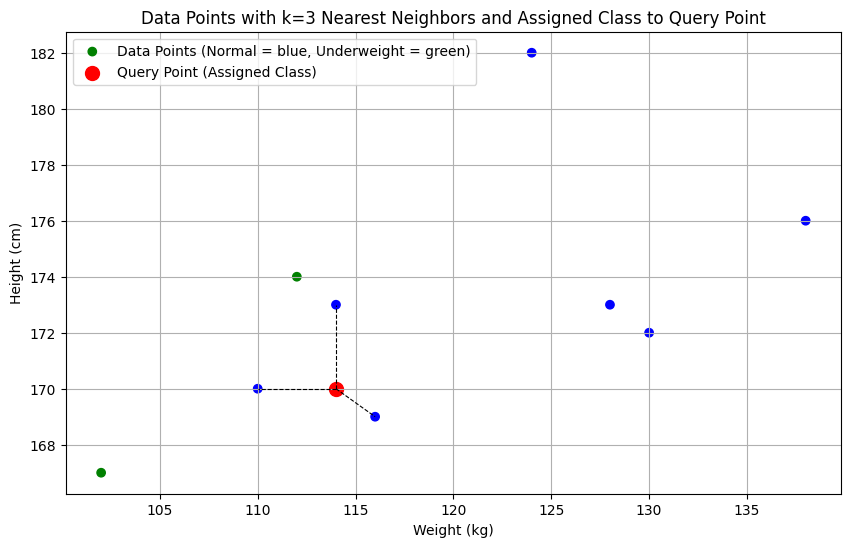

In [ ]:
# Set k value
k = 3

# Sort the DataFrame by distance to get the k nearest neighbors
nearest_neighbors = df.sort_values(by="Distance").head(k)

# Determine the majority class among the k nearest neighbors
majority_class = nearest_neighbors['Class'].mode()[0]

# Append the query point to the DataFrame with its assigned class
query_data = {'Height': [query_point[0]], 'Weight': [query_point[1]], 'Class': [majority_class], 'Distance': [0]}
df_with_query = pd.concat([df, pd.DataFrame(query_data)], ignore_index=True)

# Define colors for plotting, with the query point in red
class_colors = {'Normal': 'blue', 'Underweight': 'green'}
df_with_query['Color'] = df_with_query['Class'].map(class_colors)
df_with_query.loc[df_with_query.index[-1], 'Color'] = 'red'  # Query point color

# Plot with Weight on X-axis and Height on Y-axis, including query point with assigned class
plt.figure(figsize=(10, 6))
plt.scatter(df_with_query['Weight'], df_with_query['Height'], c=df_with_query['Color'], label="Data Points")
plt.scatter(query_point[1], query_point[0], color='red', label="Query Point (Assigned Class)", s=100)

# Draw lines representing distances to the k nearest neighbors
for _, row in nearest_neighbors.iterrows():
    plt.plot([query_point[1], row['Weight']], [query_point[0], row['Height']], 'k--', linewidth=0.8)

# Labeling and Legend
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title(f"Data Points with k={k} Nearest Neighbors and Assigned Class to Query Point")
plt.legend(["Data Points (Normal = blue, Underweight = green)", "Query Point (Assigned Class)"])
plt.grid(True)
plt.show()

The plot now shows the query point in red, assigned to the majority class of its 3 nearest neighbors, with dashed lines representing distances to these neighbors. The color coding reflects the class labels: blue for "Normal" and green for "Underweight." L

**Selecting an optimal value of k**

k in the K-Nearest Neighbors (K-NN) algorithm is important for achieving the best classification or regression performance. Here are several methods and considerations for choosing
𝑘
:

1. Rule of Thumb
A common rule is to choose
𝑘
  as the square root of the number of data points,
$\sqrt{N}$

 .
For example, if you have 100 data points, then
$𝑘
≈
10$

This rule is a good starting point but often needs refinement based on the data and problem context.
2. Odd
𝑘
 Values for Binary Classification
If your classification task has two classes, using an odd
𝑘
k (e.g., 3, 5, 7) helps avoid ties in voting.
For multi-class classification, odd
𝑘
  values are less crucial but can still help reduce tie occurrences.
3. Nested Cross-Validation
Perform Nested cross-validation with different
𝑘
  values.
For each
𝑘
 , measure the average accuracy (or another relevant metric, like F1 score) on the validation set.
Select the
𝑘
  that maximizes the cross-validation accuracy or minimizes the error.
4. Elbow Method for K-NN
Plot the error rate (or accuracy) versus
𝑘.
Look for an "elbow" point where the rate of improvement slows down, as it indicates a balance between overfitting (too small
𝑘
) and underfitting (too large
𝑘
).
5. Impact of Small
𝑘
 Values
Small values of
𝑘
 capture more local information, which can result in high sensitivity to noise or outliers (overfitting).
𝑘
=
1
 assigns the class of the nearest neighbor, which is highly sensitive to single data points.
6. Impact of Large
𝑘
Values
Large
𝑘 values smooth out predictions by averaging over a larger number of neighbors, which can be beneficial if the dataset is noisy.
However, if
𝑘
is too large, the model may underfit by averaging away meaningful distinctions between classes.
7. Visual Inspection (If Possible)
For low-dimensional data (like 2D or 3D), visualize the data points and try different
𝑘
values to observe the model's decision boundaries.
This can help in understanding how increasing or decreasing
𝑘 affects the regions around each class.

Yes, that’s correct! Using nested cross-validation (CV) is a more robust approach for hyperparameter tuning, especially for models like K-NN where selecting the right \( k \) value can significantly impact performance. Nested cross-validation provides an unbiased estimate of the model’s performance on unseen data and ensures that hyperparameters are tuned in a way that generalizes well.

### How Nested Cross-Validation Works

In nested CV, there are two levels of cross-validation:

1. **Outer Loop (Validation Set Selection)**:
   - The data is split into multiple folds (e.g., 5 or 10 folds).
   - In each fold, one subset is used as a test set to evaluate the model’s generalization performance.

2. **Inner Loop (Hyperparameter Tuning)**:
   - For each train-test split created by the outer loop, the inner loop performs cross-validation on the training data only.
   - This inner cross-validation is used to tune hyperparameters, such as \( k \) in K-NN, by training the model on various training-validation splits and selecting the best \( k \) based on the inner validation set performance.
   - Once the optimal \( k \) is chosen from the inner loop, the model is re-trained on the entire training data of the outer loop split with that optimal \( k \), and the performance is evaluated on the test fold from the outer loop.

### Why Nested Cross-Validation?

- **Reduces Overfitting to Hyperparameters**: By tuning on a separate inner cross-validation set, it prevents overfitting to a single validation set.
- **Provides Unbiased Performance Estimates**: The outer test set ensures an unbiased performance evaluation, as it’s never used in tuning.



### Breakdown of the Code:

- **`GridSearchCV`**: This is used for the inner loop. It performs cross-validation on different values of \( k \) to find the best one.
- **`cross_val_score` with `outer_cv`**: This handles the outer loop, where we evaluate the performance of the model with the optimal \( k \) selected in each iteration of the outer loop.

### Interpreting Results

- The nested CV accuracy scores give the model’s performance across the outer folds.
- The mean accuracy across outer folds provides an unbiased estimate of the model’s expected performance on unseen data.

Using nested cross-validation is particularly beneficial for complex datasets or models with multiple hyperparameters, as it prevents overly optimistic performance estimates due to hyperparameter overfitting.






### Explanation

- **Outer Loop (K-Fold)**: Splits data into training and testing sets for each fold.
- **Inner Loop (`GridSearchCV`)**: Runs a grid search over `k` values within each outer training set.
- **Tracking Optimal `k`**: After fitting `GridSearchCV`, we capture `best_k` using `grid_search.best_params_['n_neighbors']` for each fold.
- **Results**: `selected_k_values` records the best `k` for each outer fold, and `outer_scores` records the accuracy for each fold with that `k`. We also compute the most frequently selected `k` as an indication of an overall preferred value.

### Output

This code will print:
1. The best \( k \) values selected in each outer fold.
2. The accuracy score for each outer fold.
3. The mean accuracy across all outer folds.
4. The most frequently selected \( k \) value, which is often a good choice for final model selection.

This approach provides both an evaluation of model performance and insights into the optimal \( k \) values based on nested cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import numpy as np

# Example data (replace with your actual dataset)
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Define the range of k values to test
param_grid = {'n_neighbors': range(1, 20)}

# Initialize outer cross-validation for model evaluation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# To store results
outer_scores = []
selected_k_values = []

# Perform nested cross-validation manually to capture selected k
for train_idx, test_idx in outer_cv.split(X):
    # Split data into outer train/test sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Initialize inner cross-validation for hyperparameter tuning
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)

    # Perform GridSearchCV on the training data of the current outer fold
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Record the best k for this outer fold and the corresponding accuracy score
    best_k = grid_search.best_params_['n_neighbors']
    selected_k_values.append(best_k)

    # Evaluate on the outer test set
    outer_score = grid_search.score(X_test, y_test)
    outer_scores.append(outer_score)

# Output results
print("Selected k values in each outer fold:", selected_k_values)
print("Accuracy scores for each outer fold:", outer_scores)
print("Mean accuracy across outer folds:", np.mean(outer_scores))
print("Most frequently selected k value:", max(set(selected_k_values), key=selected_k_values.count))


Selected k values in each outer fold: [1, 1, 3, 1, 1]
Accuracy scores for each outer fold: [0.95, 1.0, 1.0, 1.0, 1.0]
Mean accuracy across outer folds: 0.99
Most frequently selected k value: 1


a ValueError can be raised because the number of neighbors
𝑘
k exceeded the number of available samples in some inner training folds.

In K-NN, the value of
𝑘
k must be less than or equal to the number of samples in the training set. When using high values of
𝑘
k on small datasets, this constraint can be violated during cross-validation splits, causing errors.

Solutions to Prevent These Errors
Adjust the Range of
𝑘
k:

Limit
𝑘
k to be less than the smallest fold size. For example, if each fold has about 5 samples, set
𝑘
k to a maximum of 4.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Given data
data = {
    'Height': [167, 182, 176, 173, 172, 174, 169, 173, 170],
    'Weight': [102, 124, 138, 128, 130, 112, 116, 114, 110],
    'Class': ['Underweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Underweight', 'Normal', 'Normal', 'Normal']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df[['Height', 'Weight']]
y = df['Class']

# Encode labels for KNeighborsClassifier
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define the range of k values to test
#param_grid = {'n_neighbors': range(1, 10)}  # Testing k from 1 to 9
# Restrict the range of k values to avoid exceeding fold sizes
#param_grid = {'n_neighbors': range(1, min(5, len(X) // outer_cv.get_n_splits()))}

# Define the range of k values to test, ensuring it's not empty
# We need to make sure that the upper bound of the range is greater than the lower bound
# For example, if len(X) // outer_cv.get_n_splits() is 1, we'll use range(1, 3) instead

max_k = min(5, len(X) // outer_cv.get_n_splits())
param_grid = {'n_neighbors': range(1, max(3, max_k))}


# Initialize outer cross-validation for model evaluation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

# To store results
outer_scores = []
selected_k_values = []

# Perform nested cross-validation manually to capture selected k
for train_idx, test_idx in outer_cv.split(X):
    # Split data into outer train/test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Initialize inner cross-validation for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=1)

    # Perform GridSearchCV on the training data of the current outer fold
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=inner_cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Record the best k for this outer fold and the corresponding accuracy score
    best_k = grid_search.best_params_['n_neighbors']
    selected_k_values.append(best_k)

    # Evaluate on the outer test set
    outer_score = grid_search.score(X_test, y_test)
    outer_scores.append(outer_score)

# Output results
optimal_k = max(set(selected_k_values), key=selected_k_values.count)

{
    "Selected k values in each outer fold": selected_k_values,
    "Accuracy scores for each outer fold": outer_scores,
    "Mean accuracy across outer folds": np.mean(outer_scores),
    "Most frequently selected k value (optimal k)": optimal_k
}

{'Selected k values in each outer fold': [2, 1, 2, 2, 1],
 'Accuracy scores for each outer fold': [1.0, 0.5, 0.5, 1.0, 0.0],
 'Mean accuracy across outer folds': 0.6,
 'Most frequently selected k value (optimal k)': 2}